In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split



In [3]:
# Cargar el dataset
data = pd.read_csv('data.csv')

# Convertir la columna "Month" a un índice de tiempo
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Preparar las características y etiquetas
X = data['Sunspots'].values



In [4]:
# Crear series de tiempo para RNN con una ventana de tiempo de 10
window_size = 10
X_rnn = []
y_rnn = []
for i in range(len(X) - window_size):
    X_rnn.append(X[i:i + window_size])
    y_rnn.append(X[i + window_size])
X_rnn = np.array(X_rnn)
y_rnn = np.array(y_rnn)

# Para FFNN, simplemente usamos los datos actuales sin ventana de tiempo
X_ffnn = X_rnn.reshape(X_rnn.shape[0], -1)
y_ffnn = y_rnn

# Dividir los datos en entrenamiento y prueba
X_ffnn_train, X_ffnn_test, y_ffnn_train, y_ffnn_test = train_test_split(X_ffnn, y_ffnn, test_size=0.2, random_state=42)
X_rnn_train, X_rnn_test, y_rnn_train, y_rnn_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)



In [5]:
# Modelo FFNN
model_ffnn = Sequential()
model_ffnn.add(Dense(64, input_dim=X_ffnn_train.shape[1], activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(1))  # Salida para regresión
model_ffnn.compile(optimizer='adam', loss='mse')
model_ffnn.fit(X_ffnn_train, y_ffnn_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predicciones FFNN
pred_ffnn = model_ffnn.predict(X_ffnn_test)



c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [6]:
# Modelo RNN
X_rnn_train = X_rnn_train.reshape((X_rnn_train.shape[0], window_size, 1))
X_rnn_test = X_rnn_test.reshape((X_rnn_test.shape[0], window_size, 1))
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(window_size, 1), activation='relu'))
model_rnn.add(Dense(1))  # Salida para regresión
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_rnn_train, y_rnn_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Predicciones RNN
pred_rnn = model_rnn.predict(X_rnn_test)



c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


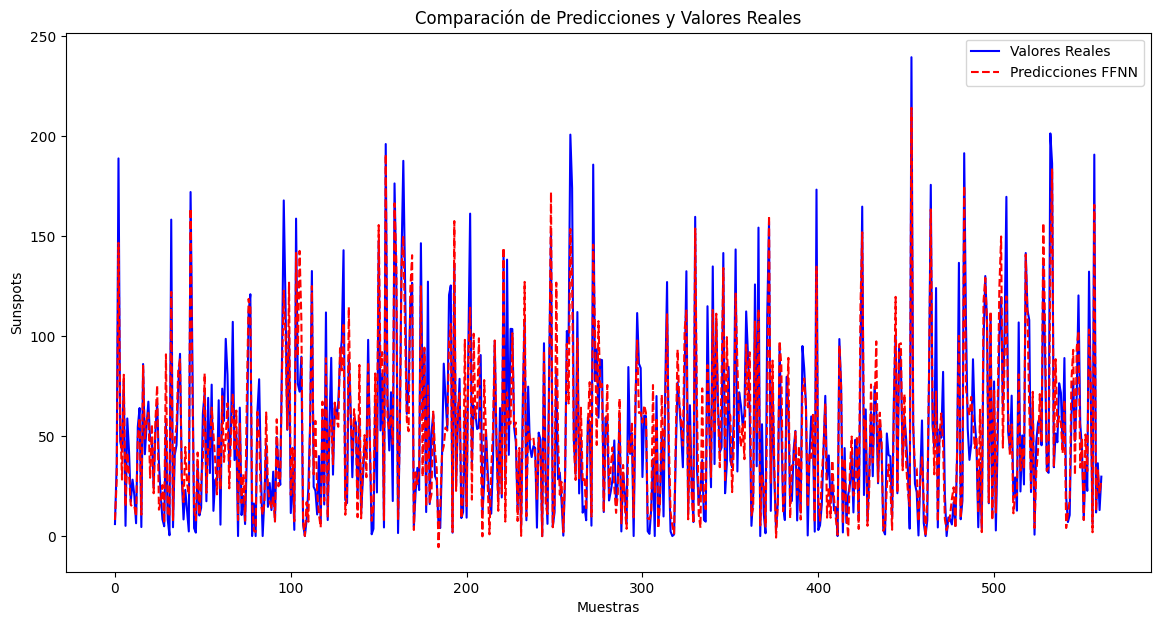

In [7]:
# Gráficas
plt.figure(figsize=(14, 7))

plt.plot(y_ffnn_test, label='Valores Reales', color='blue')
plt.plot(pred_ffnn, label='Predicciones FFNN', color='red', linestyle='--')

plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Sunspots')
plt.legend()
plt.show()


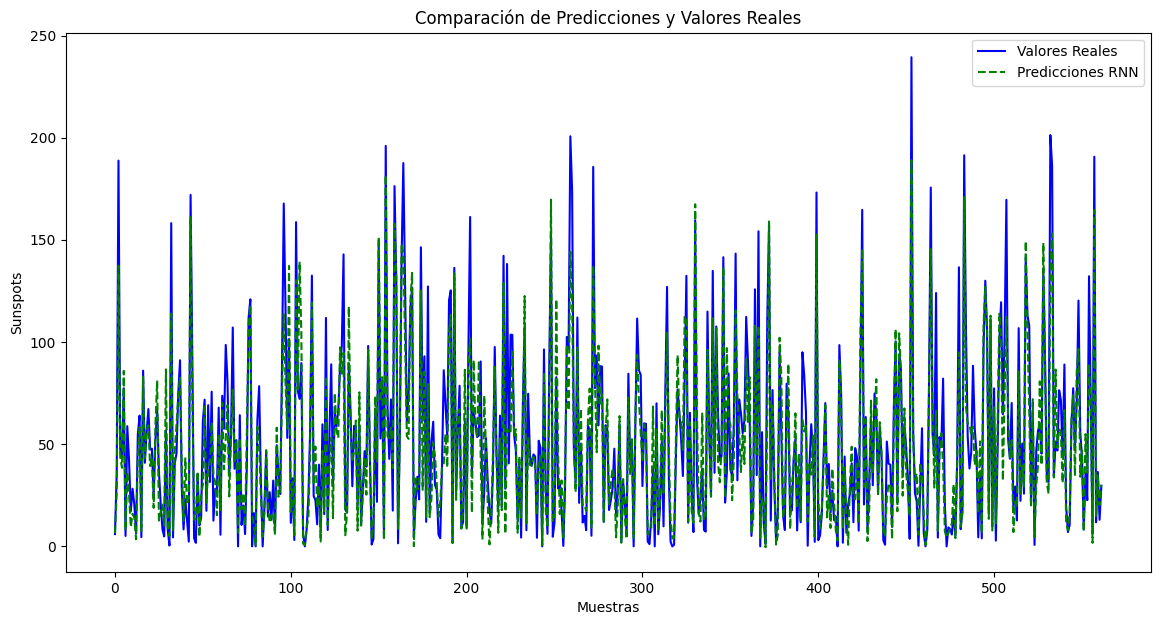

In [8]:
# Gráficas
plt.figure(figsize=(14, 7))

plt.plot(y_ffnn_test, label='Valores Reales', color='blue')
plt.plot(pred_rnn, label='Predicciones RNN', color='green', linestyle='--')

plt.title('Comparación de Predicciones y Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Sunspots')
plt.legend()
plt.show()
